In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(0, '/home/josef/Projects/ana_cont_offdiag')
from ana_cont import continuation as cont

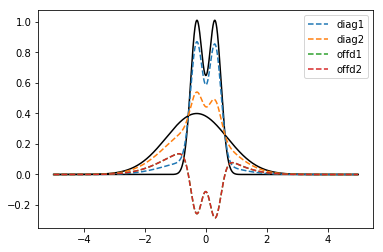

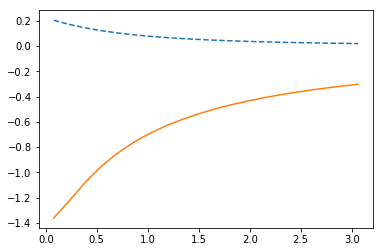

In [56]:
true_w = np.linspace(-5.,5.,num=5001, endpoint=True)
beta = 40.
niw = 20
iw = np.pi/beta * (2.*np.arange(niw) + 1.)
def gauss_peak(center, width):
    return np.exp(-(true_w-center)**2/(2.*width**2)) / (width*np.sqrt(2.*np.pi))
true_spec_1 = 0.5*gauss_peak(0.3, 0.2) + 0.5*gauss_peak(-0.3, 0.2)
true_spec_2 = gauss_peak(-0.3, 1.)

spec_matrix = np.zeros((2,2,true_w.shape[0]))
spec_matrix[0,0] = true_spec_1
spec_matrix[1,1] = true_spec_2

rot_ang = 0.5
rot_mat = np.array([[np.cos(rot_ang), np.sin(rot_ang)],[-np.sin(rot_ang), np.cos(rot_ang)]])

true_spec_rot = np.einsum('ij,jkw,kl', rot_mat, spec_matrix, rot_mat.transpose())

plt.plot(true_w, true_spec_1, color='black')
plt.plot(true_w, true_spec_2, color='black')
plt.plot(true_w, true_spec_rot[0,0], label='diag1', ls='--')
plt.plot(true_w, true_spec_rot[1,1], label='diag2', ls='--')
plt.plot(true_w, true_spec_rot[0,1], label='offd1', ls='--')
plt.plot(true_w, true_spec_rot[1,0], label='offd2', ls='--')
plt.legend()
plt.show()


kernel = 1./(1j*iw[:,None] - true_w[None,:])
giw = np.trapz(kernel[None,None,:,:]*true_spec_rot[:,:,None,:], true_w, axis=3)
plt.plot(iw, giw[1,1].real, ls='--')
plt.plot(iw, giw[1,1].imag)
plt.show()

In [57]:
wgrid = np.linspace(-4, 4, num=400)
#model = np.ones_like(wgrid)
#model = np.exp(-(wgrid-0.9)**2) * (wgrid-0.9)**2
model_diag = np.exp(-0.5*wgrid**2)
model_diag /= np.trapz(model_diag, wgrid)
errfac = 0.001
err = errfac * np.ones_like(iw)
#perfect_model = np.abs(np.interp(wgrid, true_w, true_spec))

In [58]:
probl_00 = cont.AnalyticContinuationProblem(im_axis=iw, re_axis=wgrid, im_data=giw[0,0], kernel_mode='freq_fermionic')
probl_11 = cont.AnalyticContinuationProblem(im_axis=iw, re_axis=wgrid, im_data=giw[1,1], kernel_mode='freq_fermionic')
probl_01 = cont.AnalyticContinuationProblem(im_axis=iw, re_axis=wgrid, im_data=giw[0,1], kernel_mode='freq_fermionic')

In [97]:
sol_00,sol_all_00 = probl_00.solve(method='maxent_svd', alpha_determination='classic', stdev=err, model=model_diag, offdiag=False, preblur=True, blur_width=0.03)
sol_11,sol_all_11 = probl_11.solve(method='maxent_svd', alpha_determination='classic', stdev=err, model=model_diag, offdiag=False, preblur=True, blur_width=0.03)

spectral points: 400
data points on imaginary axis: 40
significant singular values: 31
U (40, 31)
V (400, 31)
Xi (31,)
Precomputation of coefficient matrices
Solving...
log10(alpha)=5.0000	chi2=1.0155e+04	S=-1.3218e-01	tr=5.5525	conv=0.00021,	nfev=7,	norm=1.0908404904147175
log10(alpha)=4.0000	chi2=1.0058e+03	S=-2.3422e-01	tr=7.1554	conv=0.00153,	nfev=31,	norm=1.0266287133464655
log10(alpha)=3.0000	chi2=4.4943e+01	S=-3.0581e-01	tr=8.6824	conv=0.0142,	nfev=69,	norm=1.0039013309854057
log10(alpha)=2.0000	chi2=3.4028e+01	S=-3.2192e-01	tr=10.2288	conv=0.159,	nfev=208,	norm=1.0000266662808004
log10(alpha)=1.0000	chi2=7.3153e+01	S=-3.2614e-01	tr=11.7791	conv=1.81,	nfev=869,	norm=1.0003134303613188
prediction for optimal alpha: 17.504383274661 log10(alphaOpt)= 1.2431468140367907
log10(alpha)=1.2431	chi2=6.3615e+01	S=-3.2542e-01	tr=11.4168	conv=1.0,	nfev=367,	norm=1.0002153017734778
log10(alpha)=1.2432	chi2=6.3613e+01	S=-3.2542e-01	tr=11.4167	conv=1.0,	nfev=3,	norm=1.0002152796157555
log10(alp

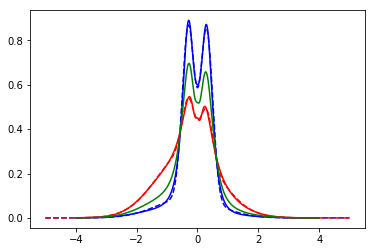

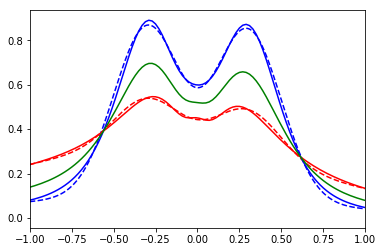

In [98]:
model_offd = np.sqrt(sol_00.A_opt * sol_11.A_opt)
plt.plot(true_w, true_spec_rot[0,0], color='blue', ls='--')
plt.plot(true_w, true_spec_rot[1,1], color='red', ls='--')
plt.plot(wgrid, sol_00.A_opt, color='blue')
plt.plot(wgrid, sol_11.A_opt, color='red')
plt.plot(wgrid, model_offd, color='green')
plt.show()

plt.plot(true_w, true_spec_rot[0,0], color='blue', ls='--')
plt.plot(true_w, true_spec_rot[1,1], color='red', ls='--')
plt.plot(wgrid, sol_00.A_opt, color='blue')
plt.plot(wgrid, sol_11.A_opt, color='red')
plt.plot(wgrid, model_offd, color='green')
plt.xlim(-1,1)
plt.show()

In [99]:
sol_01, sol_all_01 = probl_01.solve(method='maxent_svd', alpha_determination='classic', stdev=err, model=model_offd, offdiag=True, preblur=False, blur_width=0.05)

spectral points: 400
data points on imaginary axis: 40
significant singular values: 31
U (40, 31)
V (400, 31)
Xi (31,)
Precomputation of coefficient matrices
Solving...
log10(alpha)=5.0000	chi2=1.8179e+03	S=-2.8941e-02	tr=5.9237	conv=0.00102,	nfev=6,	norm=-0.047397950442563494
log10(alpha)=4.0000	chi2=1.0699e+02	S=-5.1107e-02	tr=7.6804	conv=0.00751,	nfev=8,	norm=-0.012599217521833295
log10(alpha)=3.0000	chi2=2.1640e+00	S=-6.1677e-02	tr=9.3387	conv=0.0757,	nfev=14,	norm=-0.0013231157682944972
log10(alpha)=2.0000	chi2=7.2344e-02	S=-6.3789e-02	tr=10.8977	conv=0.854,	nfev=32,	norm=0.00011901101131669978
log10(alpha)=1.0000	chi2=2.1926e-03	S=-6.4562e-02	tr=12.3862	conv=9.59,	nfev=94,	norm=-0.0001528051186420326
prediction for optimal alpha: 86.06863574888021 log10(alphaOpt)= 1.9348449191335602
log10(alpha)=1.9348	chi2=5.9163e-02	S=-6.3859e-02	tr=10.9999	conv=1.0,	nfev=4,	norm=0.00010110110217242951
log10(alpha)=1.9349	chi2=5.9171e-02	S=-6.3859e-02	tr=10.9998	conv=1.0,	nfev=3,	norm=0.0001011

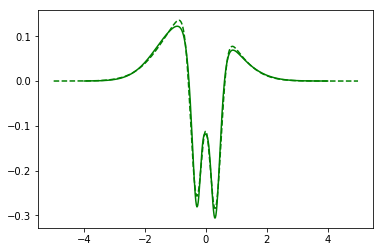

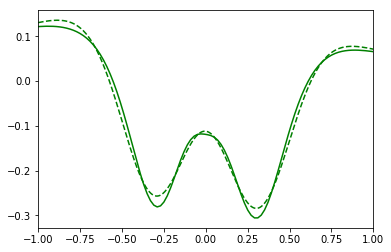

In [90]:
plt.plot(wgrid, sol_01.A_opt, color='green')
plt.plot(true_w, true_spec_rot[0,1], color='green', ls='--')
plt.show()

plt.plot(wgrid, sol_01.A_opt, color='green')
plt.plot(true_w, true_spec_rot[0,1], color='green', ls='--')
plt.xlim(-1,1)
plt.show()

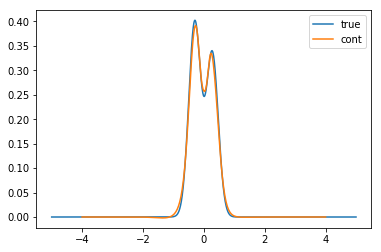

In [91]:
spec_rot = np.zeros((2,2,sol_00.A_opt.shape[0]))
spec_rot[0,0] = sol_00.A_opt
spec_rot[1,1] = sol_11.A_opt
spec_rot[0,1] = sol_01.A_opt
spec_rot[1,0] = sol_01.A_opt # 10 and 01 are identical

true_det = true_spec_1 * true_spec_2
true_det = np.linalg.det(true_spec_rot.transpose((2,0,1)))
det = np.linalg.det(spec_rot.transpose((2,0,1)))

plt.plot(true_w, true_det, label='true')
plt.plot(wgrid, det, label='cont')
plt.legend()
plt.show()